# Steganography
## Exercise 3
Tientso Ning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [15]:
#insert secret image into cover image
def insert_stego(secret, cover):
    
    '''
    inserts secret image into the cover image, producing a stego image
    '''
    secret = np.copy(secret)
    cover = np.copy(cover)
    
    assert secret.shape == cover.shape #same size
    rows, col = secret.shape[0], secret.shape[1]
    
    #split image into color channels
    cR, cG, cB = cv2.split(np.copy(cover))
    sR, sG, sB = cv2.split(np.copy(secret))
    
    #split color channels into bit planes
    cR_p = np.zeros((rows, col, 8))
    cG_p = np.zeros((rows, col, 8))
    cB_p = np.zeros((rows, col, 8))
    
    sR_p = np.zeros((rows, col, 8))
    sG_p = np.zeros((rows, col, 8))
    sB_p = np.zeros((rows, col, 8))
    
    for i in range(0, rows):
        for j in range(0, col):
            
            #cover layer
            binaryPixel = np.binary_repr(cR[i,j],8)
            binaryPixel2 = np.binary_repr(cG[i,j],8)
            binaryPixel3 = np.binary_repr(cB[i,j],8)
            
            #secret layer
            binaryPixel4 = np.binary_repr(sR[i,j],8)
            binaryPixel5 = np.binary_repr(sG[i,j],8)
            binaryPixel6 = np.binary_repr(sB[i,j],8)

            k=0
            for b in range(len(binaryPixel)-1,-1,-1):
                
                #cover layer
                cR_p[i,j,8-k-1] = int(binaryPixel[b],2)
                cG_p[i,j,8-k-1] = int(binaryPixel2[b],2)
                cB_p[i,j,8-k-1] = int(binaryPixel3[b],2)
                
                #secret layer
                sR_p[i,j,8-k-1] = int(binaryPixel4[b],2)
                sG_p[i,j,8-k-1] = int(binaryPixel5[b],2)
                sB_p[i,j,8-k-1] = int(binaryPixel6[b],2)
                
                k = k+1
    
    #reconstruct RGB    
    red_recon = np.stack((cR_p[:,:,0],cR_p[:,:,1],cR_p[:,:,2],cR_p[:,:,3],cR_p[:,:,4],sR_p[:,:,0],sR_p[:,:,1],sR_p[:,:,2]), axis=-1)
    green_recon = np.stack((cG_p[:,:,0],cG_p[:,:,1],cG_p[:,:,2],cG_p[:,:,3],cG_p[:,:,4],cG_p[:,:,5],sB_p[:,:,0],sB_p[:,:,1]), axis=-1)
    blue_recon = np.stack((cB_p[:,:,0],cB_p[:,:,1],cB_p[:,:,2],sG_p[:,:,0],sG_p[:,:,1],sG_p[:,:,2],sB_p[:,:,2],sB_p[:,:,3]), axis=-1)

    red_layer = np.zeros((rows,col))
    green_layer = np.zeros((rows,col))
    blue_layer = np.zeros((rows,col))
    
    for i in range(0, rows):
        for j in range(0, col):

            #select all bits of current pixel
            binaryPixel = red_recon[i,j,:]
            binaryPixel2 = green_recon[i,j,:]
            binaryPixel3 = blue_recon[i,j,:]

            #order from LSB to MSB, but in python the endian is different so we don't flip
            #binaryPixel = np.flip(binaryPixel)
            binaryPixel = binaryPixel.astype(int)
            binaryPixel2 = binaryPixel2.astype(int)
            binaryPixel3 = binaryPixel3.astype(int)

            #convert the array to decimal
            red_layer[i,j] = np.packbits(binaryPixel)
            green_layer[i,j] = np.packbits(binaryPixel2)
            blue_layer[i,j] = np.packbits(binaryPixel3)
    
    #combine layers to stego image
    return np.stack((red_layer, green_layer, blue_layer), axis=-1).astype(np.uint8)
    #return red_layer, green_layer, blue_layer

In [17]:
tower = cv2.imread("Tower.BMP")
lake = cv2.imread("Lake.BMP")

rand1 = np.random.random(tower.shape).astype(int)
rand2 = np.random.random(lake.shape).astype(int)

tower_stego = insert_stego(rand1, tower)
lake_stego = insert_stego(rand2, lake)

cv2.imwrite("Tower_stego.BMP", tower_stego)
cv2.imwrite("Lake_stego.BMP", lake_stego)

True

Text(0.5, 1.0, 'Difference')

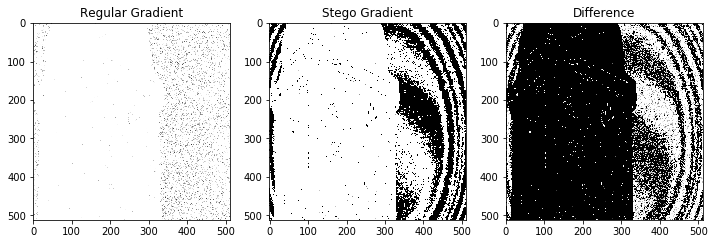

In [13]:
tower_reg_grad = cv2.imread("tower_reg_grad.BMP")
tower_stego_grad = cv2.imread("tower_stego_grad.BMP")

f, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(tower_reg_grad, cmap="Greys_r")
ax[1].imshow(tower_stego_grad, cmap="Greys_r")
ax[2].imshow(tower_reg_grad-tower_stego_grad, cmap="Greys_r")
ax[0].set_title("Regular Gradient")
ax[1].set_title("Stego Gradient")
ax[2].set_title("Difference")

Text(0.5, 1.0, 'Difference')

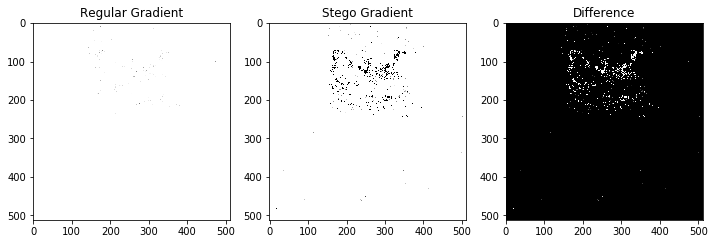

In [14]:
lake_reg_grad = cv2.imread("lake_reg_grad.BMP")
lake_stego_grad = cv2.imread("lake_stego_grad.BMP")

f, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(lake_reg_grad, cmap="Greys_r")
ax[1].imshow(lake_stego_grad, cmap="Greys_r")
ax[2].imshow(lake_reg_grad-lake_stego_grad, cmap="Greys_r")
ax[0].set_title("Regular Gradient")
ax[1].set_title("Stego Gradient")
ax[2].set_title("Difference")